In [1]:
%matplotlib inline
import numpy as np
import backprojection as bp
from scipy.constants import speed_of_light
from scipy.io import loadmat
from matplotlib import pyplot as plt

try:
    import cupy as cp
except ImportError as e:
    raise SystemExit("CuPy가 없습니다. pip install cupy-cudaXX'로 설치하세요.") from e

In [2]:
# imaging grid (meters)
x_img = np.linspace(-50, 50, 256)
y_img = np.linspace(-50, 50, 256)
z_img = 0.0  # ground plane

X, Y = np.meshgrid(x_img, y_img)

img = np.zeros_like(X, dtype=np.complex128)

c = speed_of_light


In [3]:
import os
fp = []; freq = []; ax = []; ay = []; az = []
r0 = []; th = []; phi = []
r_cor = []; ph_cor = []

for iaz in range(1, 361):
    fname = f'data_3dsar_pass8_az{str(iaz).zfill(3)}_VV.mat'
    fpath = os.path.join('/home/rtv-24n10/workspace/7.SAR/SAR_DATA/GOTCHA-CP_Disc2/DATA/pass8/VV', fname)
    
    data = loadmat(fpath)['data'][0][0].item()
            
    fp.append(data[0][:, :119])
    freq.append(data[1])
    ax.append(data[2][:, :119])
    ay.append(data[3][:, :119])
    az.append(data[4][:, :119])
    r0.append(data[5][:, :119])
    th.append(data[6][:, :119])
    phi.append(data[7][:, :119])
    r_cor.append(data[8]['r_correct'][0][0][:, :119])
    ph_cor.append(data[8]['ph_correct'][0][0][:, :119])
    
fp = np.array(fp); print("fp shape: ",fp.shape)
freq = np.squeeze(np.array(freq)); print("freq shape: ",freq.shape)
ax = np.squeeze(np.array(ax)); print("ax shape: ",ax.shape)
ay = np.squeeze(np.array(ay)); print("ay shape: ",ay.shape)
az = np.squeeze(np.array(az)); print("az shape: ",az.shape)
r0 = np.squeeze(np.array(r0)); print("r0 shape: ",r0.shape)
th = np.squeeze(np.array(th)); print("th shape: ",th.shape)
phi = np.squeeze(np.array(phi)); print("phi shape: ",phi.shape)
r_cor = np.squeeze(np.array(r_cor)); print("r_cor shape: ",r_cor.shape)
ph_cor = np.squeeze(np.array(ph_cor)); print("ph_cor shape: ",ph_cor.shape)

fp shape:  (360, 432, 119)
freq shape:  (360, 432)
ax shape:  (360, 119)
ay shape:  (360, 119)
az shape:  (360, 119)
r0 shape:  (360, 119)
th shape:  (360, 119)
phi shape:  (360, 119)
r_cor shape:  (360, 119)
ph_cor shape:  (360, 119)


In [5]:
print(freq[0]-freq[1])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

/tmp/ipykernel_13556/247029319.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axe.scatter(ax[i], ay[i], az[i], cmap='Greys')


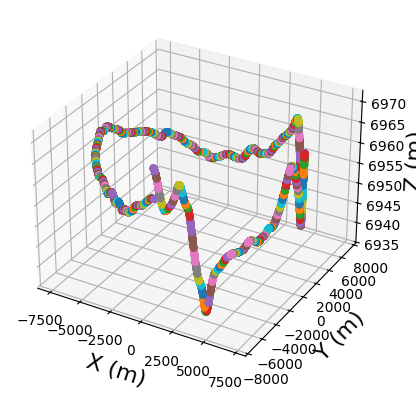

In [ ]:
print(r0)
fig = plt.figure()

axe = fig.add_subplot(projection='3d')


for i in range(360):
    axe.scatter(ax[i], ay[i], az[i], cmap='Greys')

axe.set_xlabel('X (m)', size=16)

axe.set_ylabel('Y (m)', size=16)

axe.set_zlabel('Z (m)', size=16)
plt.show()


In [ ]:
Naz, Nf, Nt = fp.shape

for iaz in range(Naz):
    for it in range(Nt):

        # antenna position
        tx = ax[iaz, it]
        ty = ay[iaz, it]
        tz = az[iaz, it]

        # slant range to all pixels
        R = np.sqrt(
            (X - tx)**2 +
            (Y - ty)**2 +
            (z_img - tz)**2
        )

        # phase term for all frequencies
        phase = np.zeros_like(R, dtype=np.complex128)

        for k in range(Nf):
            f = freq[iaz, k]
            phase += fp[iaz, k, it] * np.exp(
                1j * 4.0 * np.pi * f * R / c
            )

        img += phase


In [ ]:
img_mag = np.abs(img)
img_db = 20 * np.log10(img_mag / img_mag.max() + 1e-12)


In [ ]:
plt.figure(figsize=(7, 7))
plt.imshow(
    img_db,
    extent=[x_img.min(), x_img.max(), y_img.min(), y_img.max()],
    cmap="gray",
    origin="lower",
    vmin=-30,
    vmax=0
)
plt.colorbar(label="dB")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("SAR Backprojection Image")
plt.tight_layout()
plt.show()
